In [109]:
import sys,os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%matplotlib notebook

In [2]:
sys.path.append(os.getcwd())

# geneopt2

In [3]:
import testfuncs
import geneopt2
import goal

In [98]:
from mpl_toolkits.mplot3d import Axes3D

In [4]:
def f(val):
    x=val[0]
    y=val[1]
    return my_func.do(x,y)

In [115]:
np.meshgrid(['a','b','c'],[1,2,3])

[array([['a', 'b', 'c'],
        ['a', 'b', 'c'],
        ['a', 'b', 'c']], dtype='<U1'), array([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]])]

In [114]:
Z.shape

(100, 100)

In [147]:
def show_my_func(cmap,elev=55,azim=None):
    '''
    新しい関数を使用する際は以下のセルを実行しX,Y,Zを更新すること。
    Returns
    -------
    fig,ax,surf
    '''
    fig=plt.figure(facecolor='w')
    
    vmin=Z.min()
    vmax=Z.max()
    
    ax=fig.gca(projection='3d')
    ax.view_init(elev,azim)
    surf=ax.plot_surface(X,Y,Z,cmap=cmap,alpha=0.8,antialiased=True)
    ax.set_zlim(vmin,vmax)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
    #norm=matplotlib.colors.Normalize(vmin=vmin,vmax=vmax)
    #colorbar=fig.colorbar(plt.cm.ScalarMappable(norm=norm,cmap=cmap),ax=ax)
    #colorbar.set_ticks(np.linspace(vmin,vmax,10))
    
    return fig,ax,surf

<IPython.core.display.Javascript object>


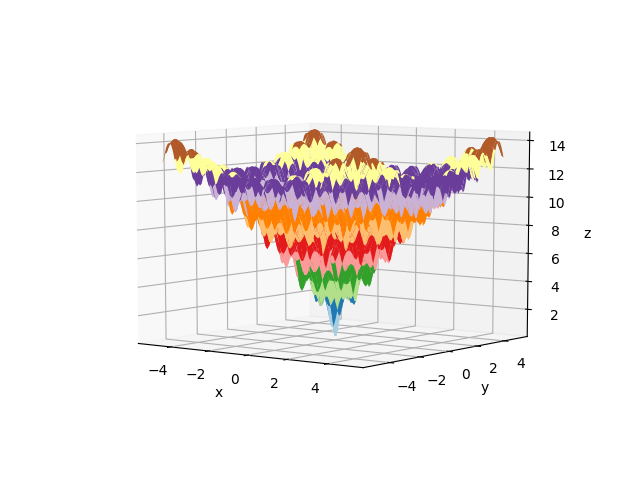

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7f2e50b79c88>)

In [130]:
my_func=testfuncs.Ackley()
X=np.linspace(my_func.Xdomain()[0],my_func.Xdomain()[1],100)
Y=np.linspace(my_func.Ydomain()[0],my_func.Ydomain()[1],100)
X,Y=np.meshgrid(X,Y)
Z=my_func.do(X,Y)
Z=np.asarray(Z)

show_my_func(matplotlib.cm.Paired)

<IPython.core.display.Javascript object>


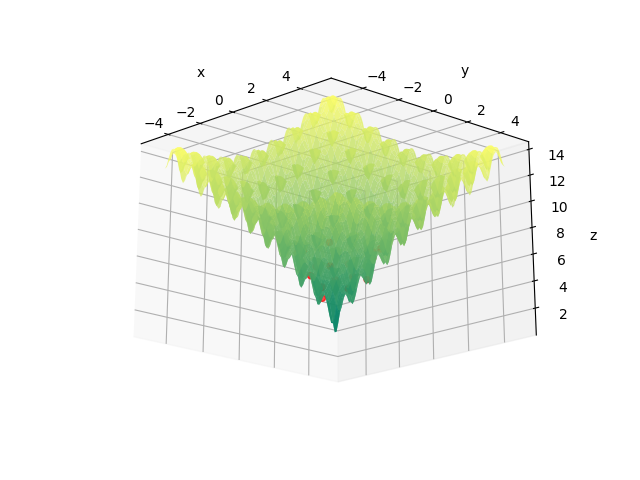

In [159]:
fig,ax,surf=show_my_func(matplotlib.cm.summer)
data=np.transpose(log[0])
ax.scatter3D(data[0],data[1],my_func.do(data[0],data[1]),c='r')

In [151]:
val_ranges=[
    (my_func.Xdomain()[0],my_func.Xdomain()[1])
    ,(my_func.Ydomain()[0],my_func.Ydomain()[1])
]
my_goal=goal.Minimize()
inherit_ways={
    geneopt2.Meaning(1):90
    ,geneopt2.SheerNew():10
}

In [152]:
N=100
num_parent=20
num_generation=15
opt=geneopt2.GeneticOptimizer(
    2 # M
    ,f
    ,val_ranges
    ,my_goal # goal
    ,N
    ,num_parent
    ,num_generation
    ,inherit_ways
)
#opt.enable_debug()

In [155]:
final_generation_variable_list=None
%time final_generation_variable_list,log=opt.execute()
save_results()

CPU times: user 110 ms, sys: 0 ns, total: 110 ms
Wall time: 195 ms


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AttributeError: 'AxesSubplot' object has no attribute 'scatter3D'

In [158]:
def save_results(cmap,elev,azim):
    for i,variable_list in enumerate(log,1):
        plt.cla()
    
        fig,ax,surf=show_my_func(cmap,elev,azim)
    
        data=np.transpose(variable_list)
        ax.scatter3D(data[0],data[1],my_func.do(data[0],data[1]),c='black')
    
        ax.set_xlim(my_func.Xdomain())
        ax.set_ylim(my_func.Ydomain())
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax.set_title('generation {}\n(N={} num_parent={})'.format(i,N,num_parent))
        
        plt.savefig('./result/{}.png'.format(i))

<IPython.core.display.Javascript object>


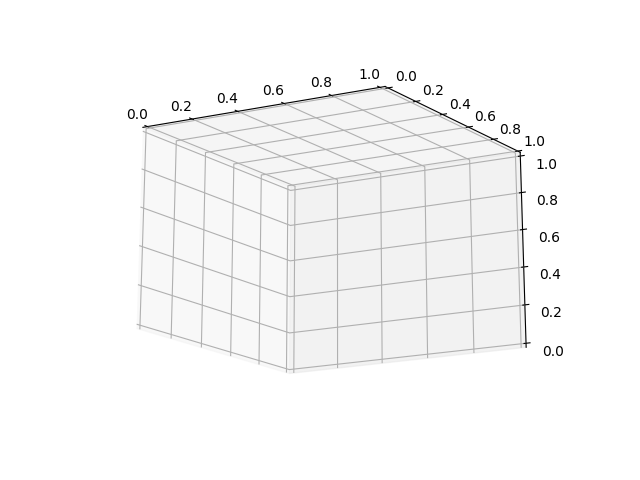

<IPython.core.display.Javascript object>


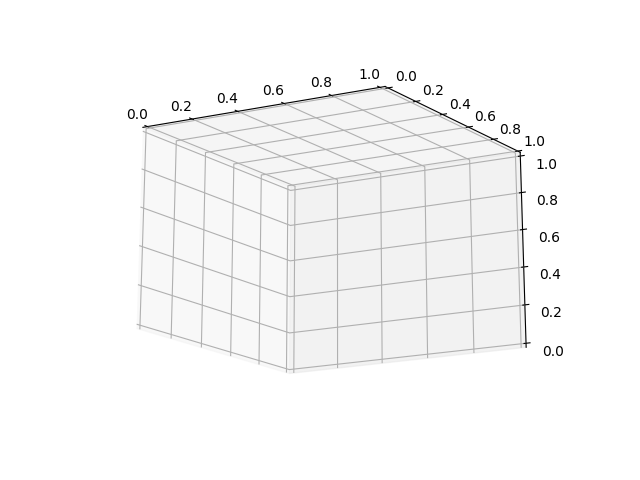

<IPython.core.display.Javascript object>


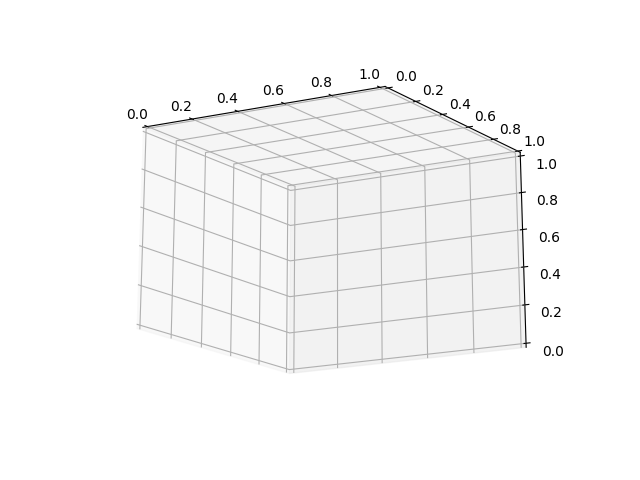

<IPython.core.display.Javascript object>


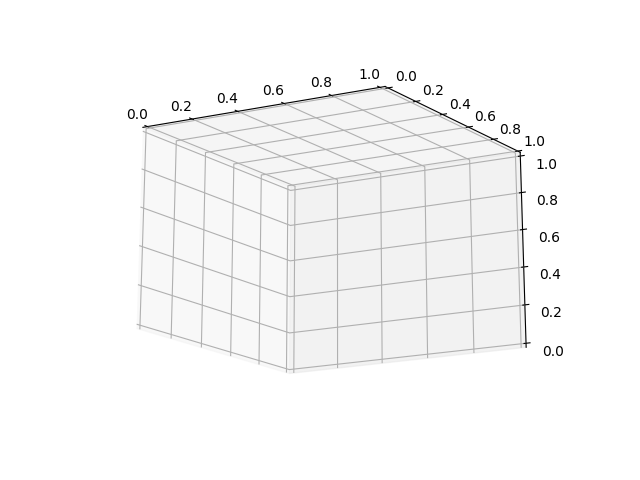

<IPython.core.display.Javascript object>


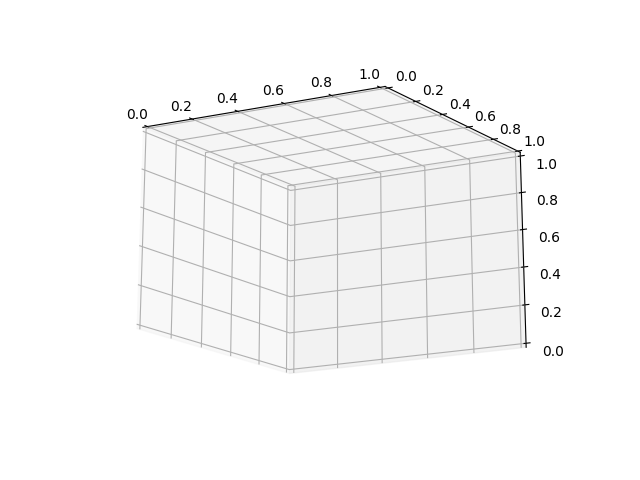

<IPython.core.display.Javascript object>


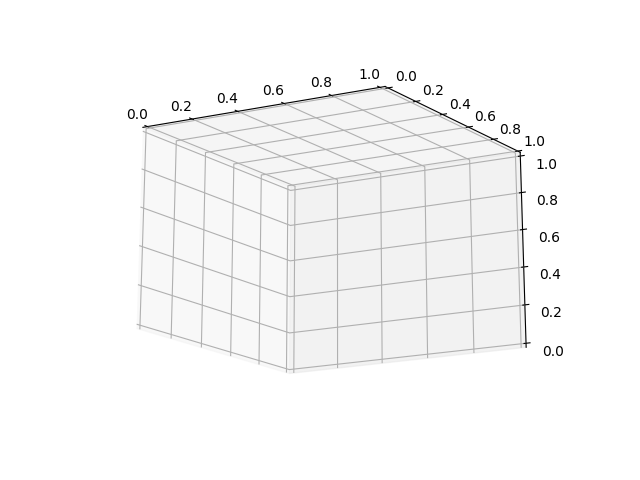

<IPython.core.display.Javascript object>


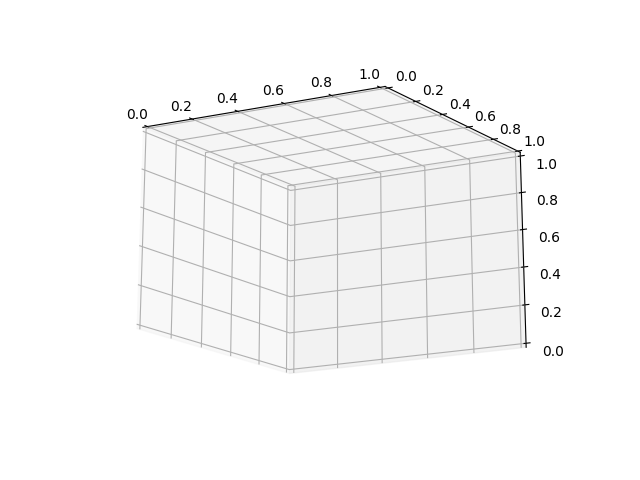

<IPython.core.display.Javascript object>


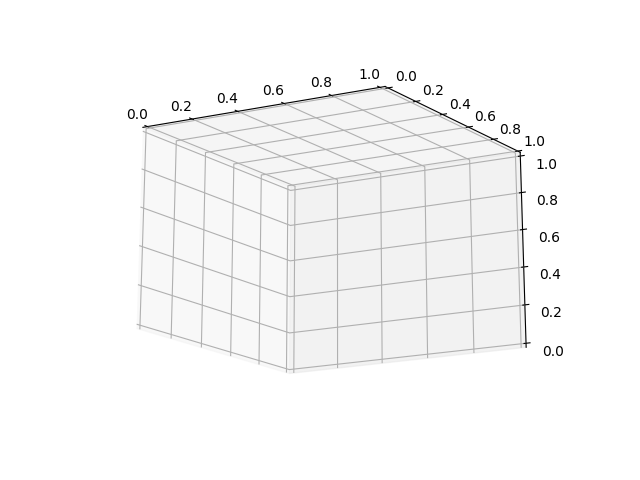

<IPython.core.display.Javascript object>


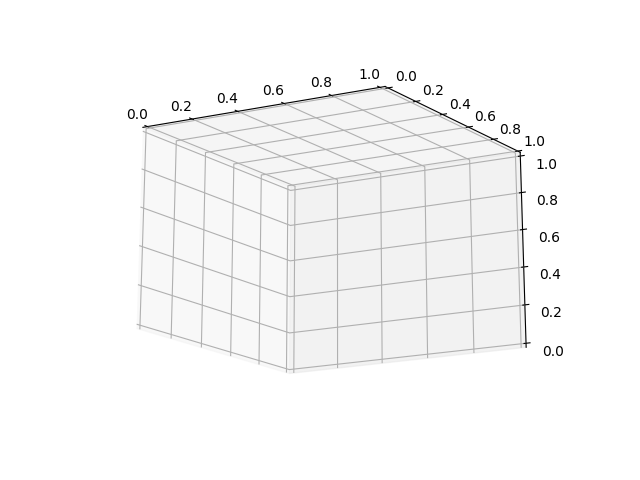

<IPython.core.display.Javascript object>


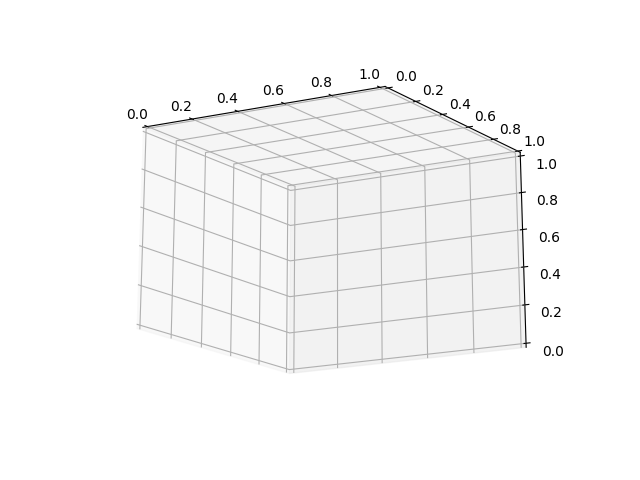

<IPython.core.display.Javascript object>


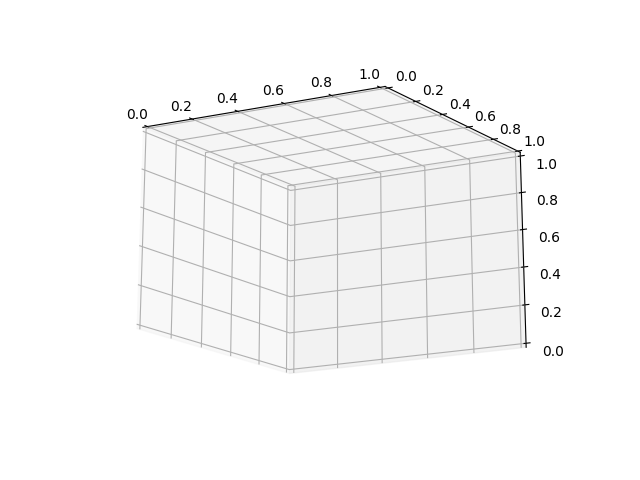

<IPython.core.display.Javascript object>


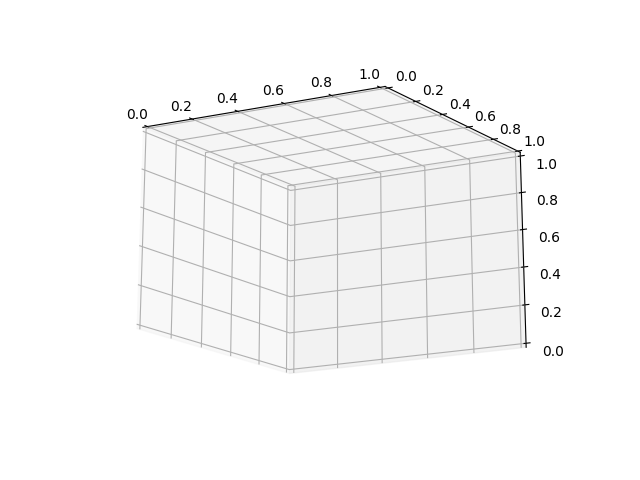

<IPython.core.display.Javascript object>


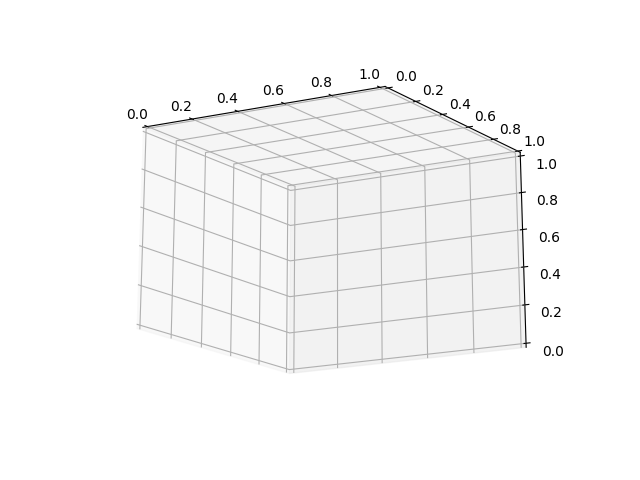

<IPython.core.display.Javascript object>


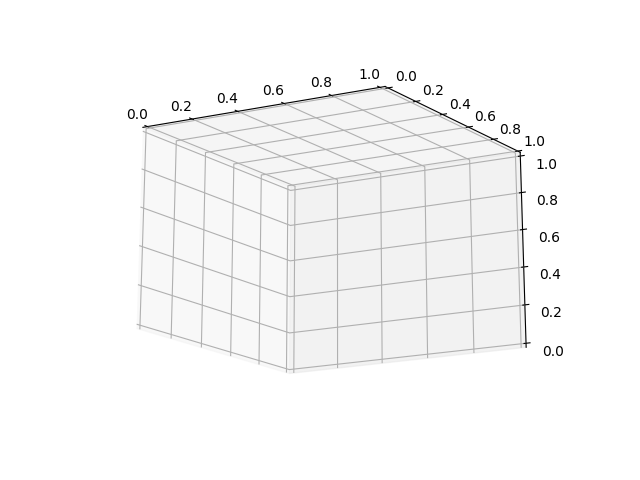

<IPython.core.display.Javascript object>


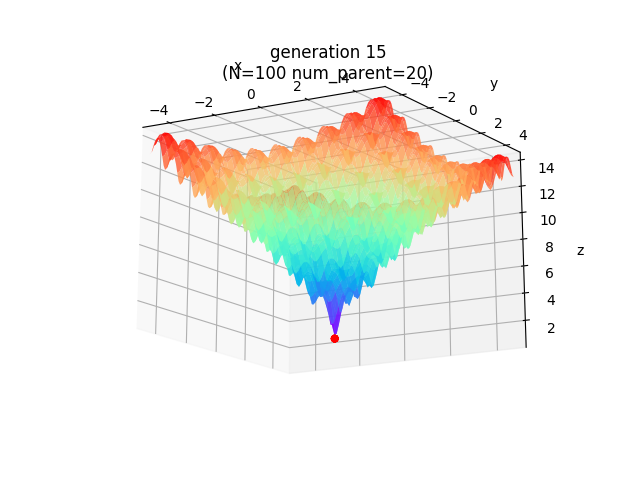

In [157]:
save_results(matplotlib.cm.terrain,)

In [264]:
print(my_func.Xmin(),my_func.Ymin())
final_generation_variable_list

[7.917] [7.917]


[[-7.39725951610447, 5.169095778104361],
 [-7.397250184999945, 5.169063950669747],
 [-7.3972525174984405, 5.169126233970329],
 [-7.397216709402861, 5.169072118311095],
 [-7.3973864865591015, 5.169115846506486],
 [-7.3973914290299865, 5.169058532186214],
 [-7.397143497102633, 5.169127245884408],
 [-7.39720428386232, 5.169229077474808],
 [-7.397462989960574, 5.169129961881046],
 [-7.39709220726691, 5.16909419446707],
 [-7.397466760796395, 5.169253586092723],
 [-7.397516136289419, 5.16898825191273],
 [-7.397224105755327, 5.169344419083456],
 [-7.397019132721053, 5.168979382791314],
 [-7.397077972971167, 5.169313539954216],
 [-7.397434145052279, 5.168790801085087],
 [-7.397417194938851, 5.168744308764173],
 [-7.397635294523875, 5.1689653446968755],
 [-7.397644004765258, 5.168964969761498],
 [-7.396956590693745, 5.1692926838154465]]

# geneopt1

In [ ]:
import goal
import geneopt1

In [ ]:
#標的関数の用意
def target_func(variable_list):
    x=variable_list[0]
    y=variable_list[1]
    return (x*x+y-11)**2+(x+y*y-7)**2

In [ ]:
import matplotlib.pyplot as plt
X=np.linspace(-6,6,100)
Y=np.linspace(-6,6,100)
Z=[]
for y in Y:
    Z.append([target_func([x,y])for x in X])
plt.pcolormesh(Z,vmin=0,vmax=700,cmap=plt.get_cmap('ocean'))

In [ ]:
#発現方法の定義
expression_x=geneopt1.Expression(-6,6,20)
expression_y=geneopt1.Expression(-6,6,20)
print(expression_x)

In [ ]:
#最適化目標の指定
my_goal=goal.Minimize()
print(my_goal)

In [ ]:
#遺伝方法の指定
inherit_ways={
    geneopt1.GeneticCrossing(0.05):1.0
    ,geneopt1.SheerMutation():0.01
}
inherit_ways

In [ ]:
my_geneopt1=geneopt1.GeneticOptimizer(
    2 #2つの変数を取る関数
    ,target_func #この関数に対して最適化する
    ,[expression_x,expression_y] #x,yをそれぞれ発現してもらう
    ,my_goal
    ,100 #1世代あたりの個体数
    ,20 #親にする個体数
    ,10 #10世代やる
    ,inherit_ways
)
my_geneopt1.enable_debug()
print(my_geneopt1)

In [ ]:
final_generation_variable_list=my_geneopt1.execute()
print(final_generation_variable_list)

In [ ]:
plt.pcolormesh(X,Y,Z,vmin=0,vmax=700,cmap=plt.get_cmap('ocean'))
for variable in final_generation_variable_list:
    plt.scatter(variable[0],variable[1],color='r',marker='.')

plt.show()